# Projeto para classificar o título de notícias

## Definição do projeto

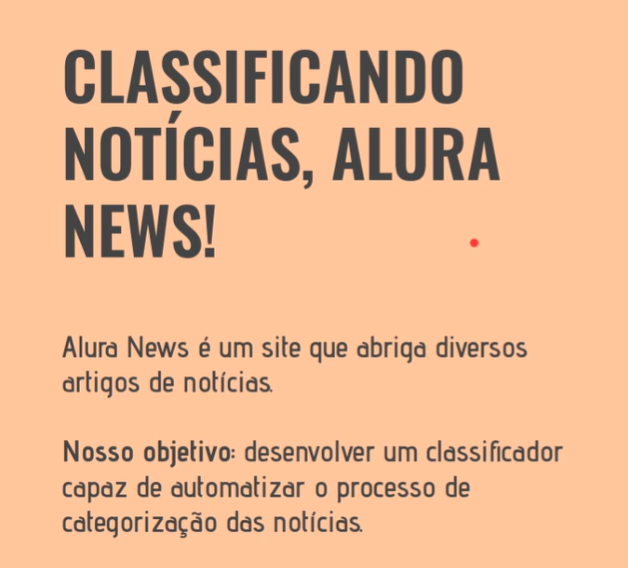

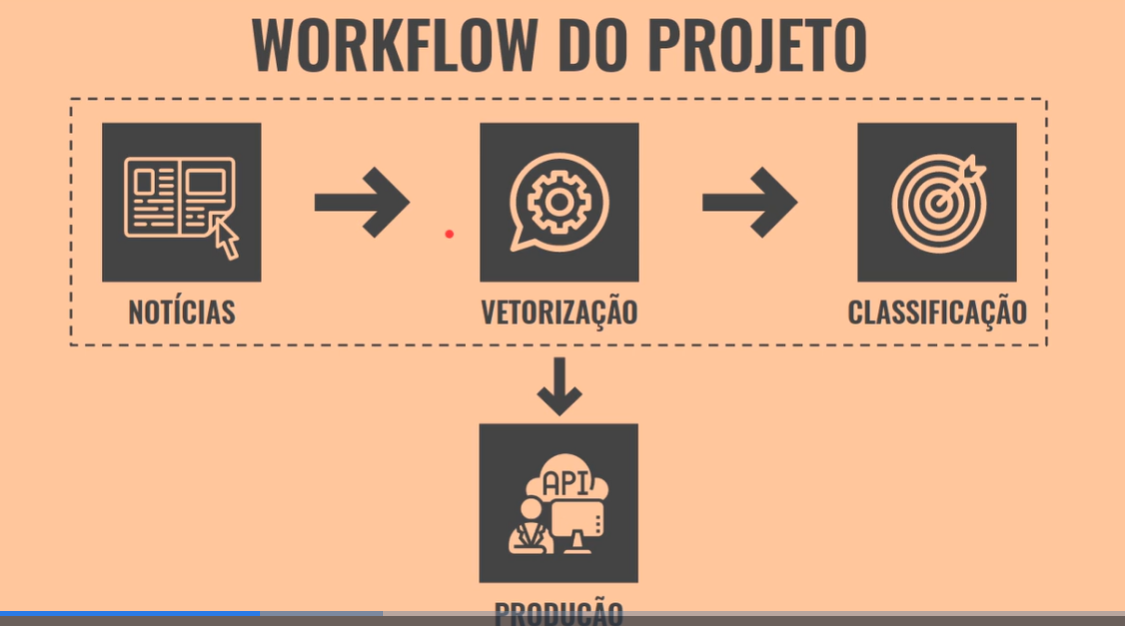

## Biblioteca [**Spacy**](https://spacy.io/usage/spacy-101)

### Features disponíveis da biblioteca Spacy

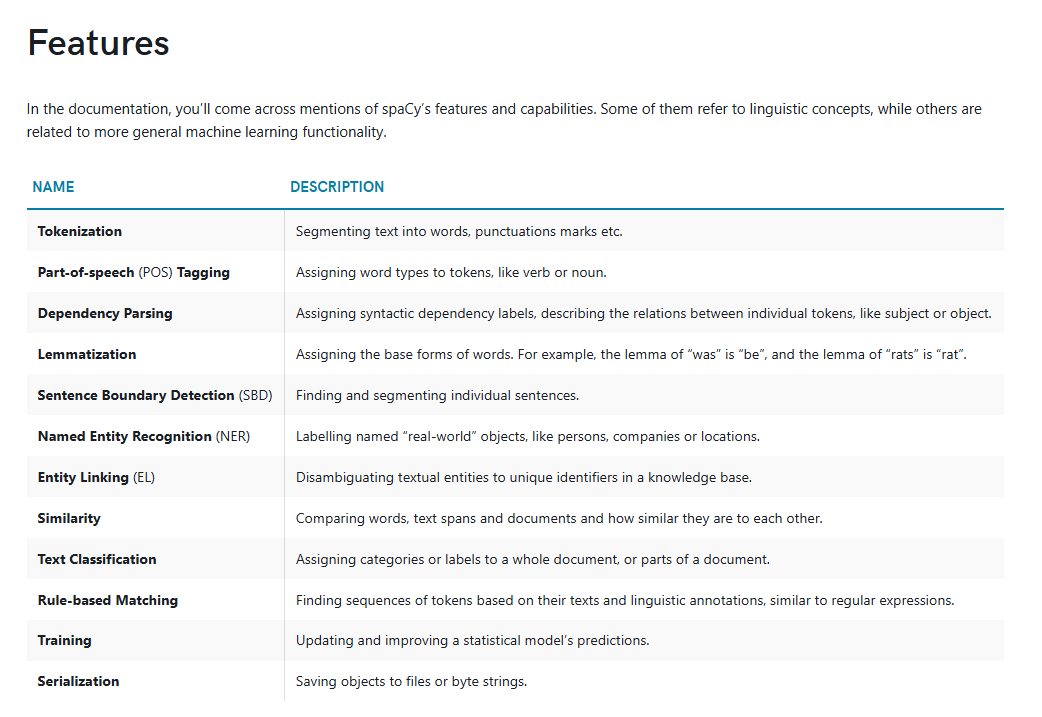

### Pipeline seguido pela biblioteca

- Ao utilizar a biblioteca Spacy é devolvido o texto de entrada tokenizado, com reconhecimento de entidades nomeadas, parsing entre outros, agilizando o processamento.

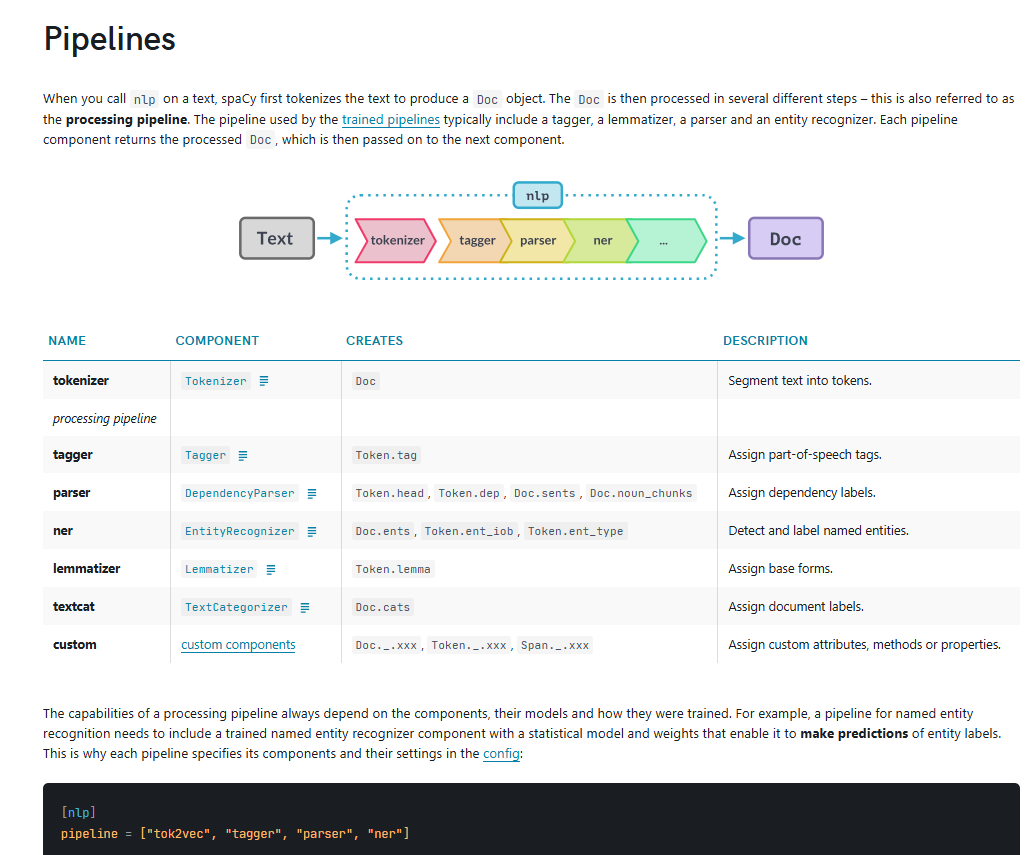

## Transformando texto em vetores

- Para trabalharmos com textos é necessário transformá-los em vetores e a partir dessa representação vetorial temos disponível várias possibilidades, como verificar similaridade, classificar por categorias.

- Essa representação vetorial pode ser conseguida de algumas formas:

 ### One Hot Encoding
    - técnica funciona criando novas colunas binárias para cada categoria única encontrada na variável original. Para cada linha de dado, apenas uma dessas novas colunas receberá o valor 1 (indicando que a categoria está presente), enquanto todas as outras receberão o valor 0.

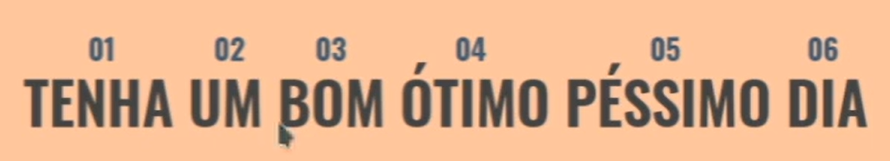

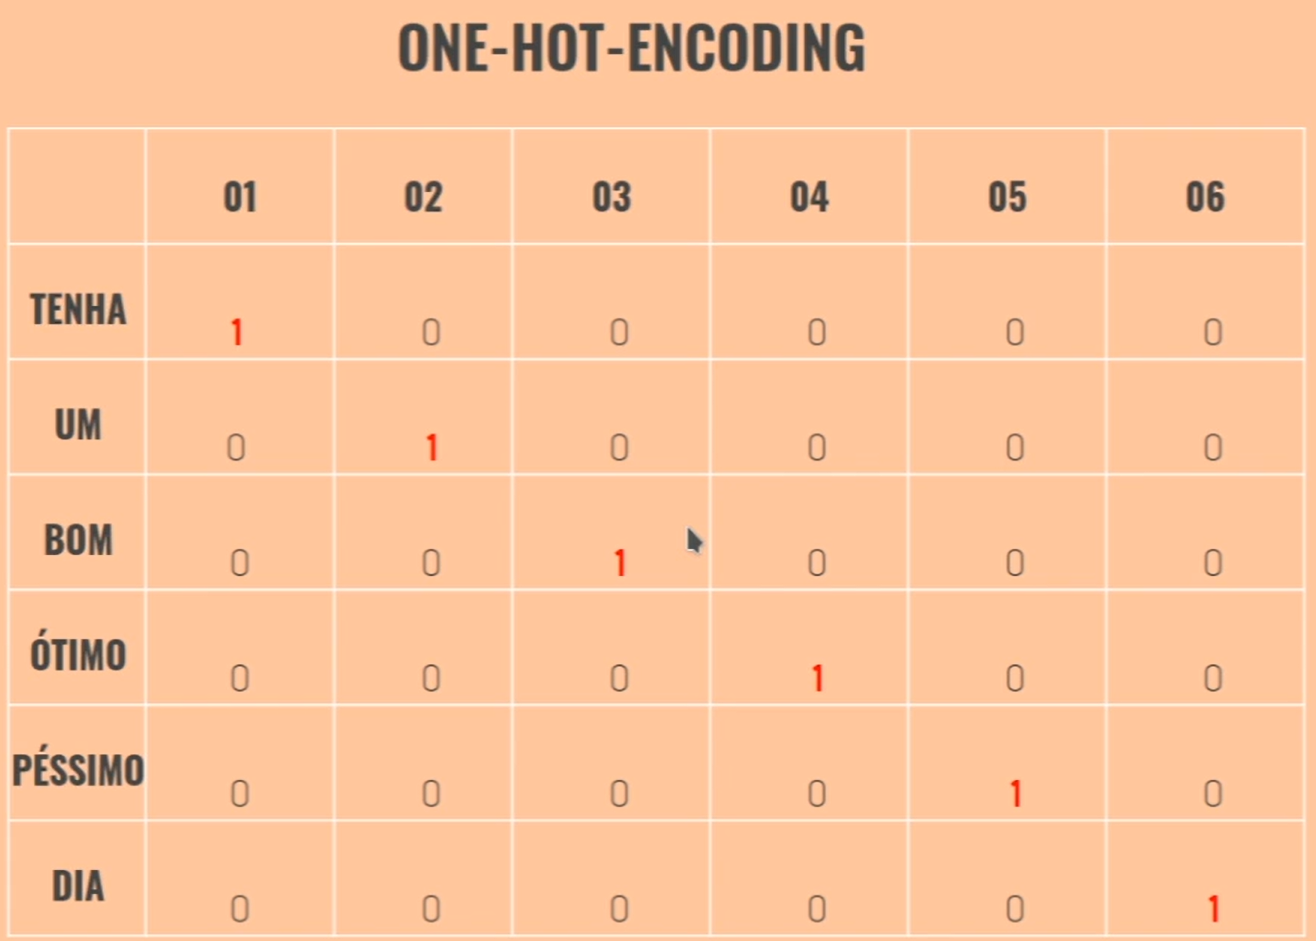

### Word2Vec

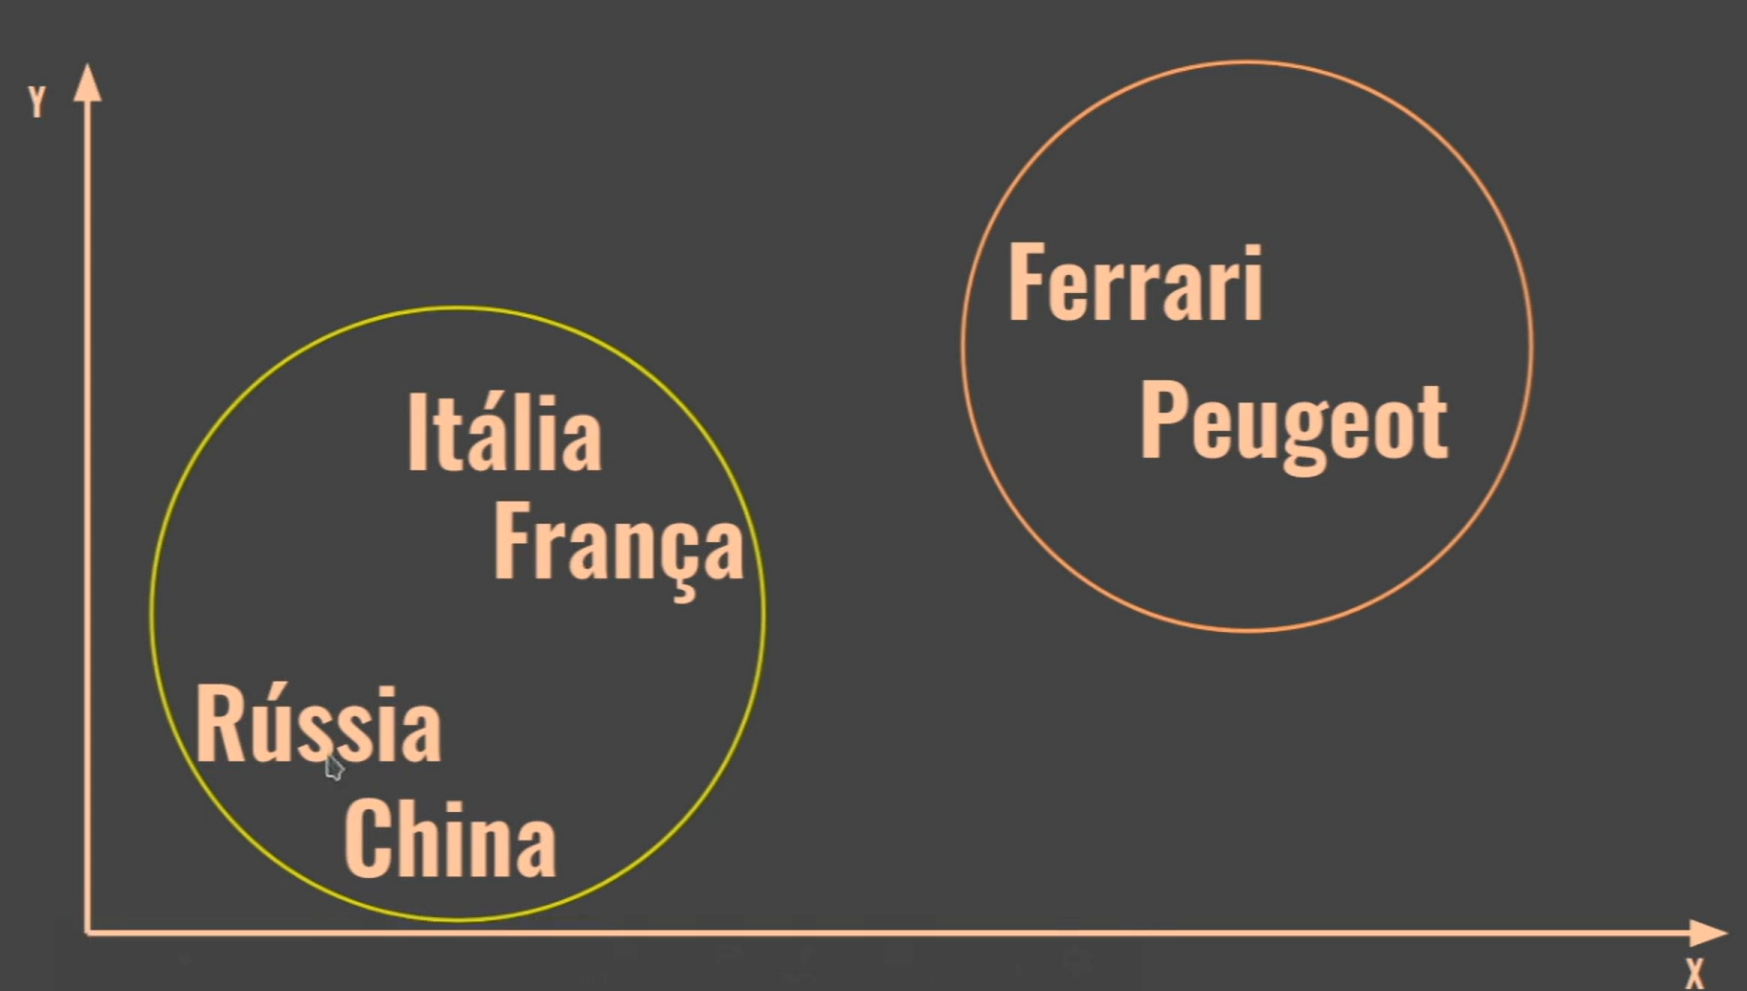

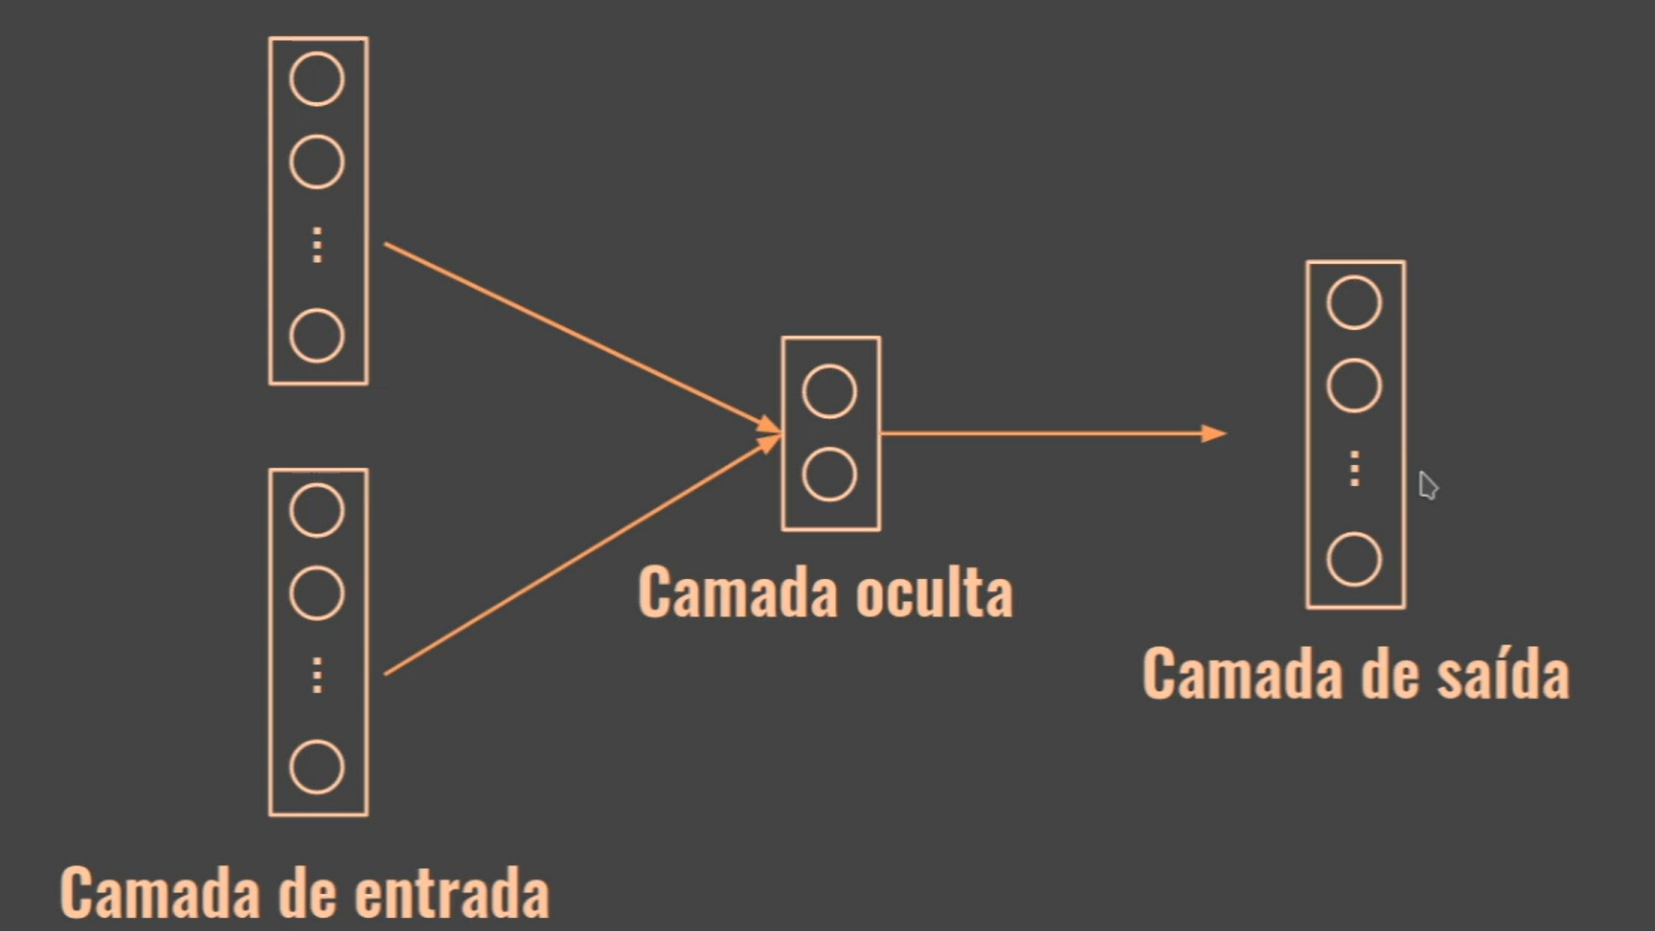

- Word2vec é uma técnica de processamento de linguagem natural que transforma palavras em vetores numéricos, chamados de word embeddings. Esses vetores capturam o significado e o contexto das palavras com base em como elas são usadas em um grande corpus de texto.

- A ideia central é: palavras que aparecem em contextos semelhantes tendem a ter significados semelhantes. O Word2vec utiliza uma rede neural simples para aprender esses padrões.

- O resultado é um espaço vetorial onde palavras com significados parecidos, como "rei" e "rainha", ficam próximas, enquanto palavras com significados diferentes ficam distantes. Essa proximidade permite realizar operações matemáticas com as palavras, como a famosa analogia: vetor("rei") - vetor("homem") + vetor("mulher") resulta em um vetor muito próximo de vetor("rainha").

#### CBOW (Continuous Bag-of-Words)
- O modelo CBOW tenta prever uma palavra central a partir das palavras que a cercam (o contexto). Imagine a frase "o gato preto subiu na árvore". Se a palavra central for "preto", o CBOW usaria as palavras "gato" e "subiu" para tentar prever "preto". Ele considera o contexto como uma "saco de palavras" (bag-of-words), o que significa que ele não se preocupa com a ordem das palavras no contexto.

- Vantagens:
  - Mais rápido para treinar: Como o CBOW processa o contexto de uma vez só para prever uma única palavra, ele é computacionalmente mais eficiente.

  - Melhor para palavras frequentes: Ele tende a dar representações mais precisas para palavras que aparecem com frequência no texto.

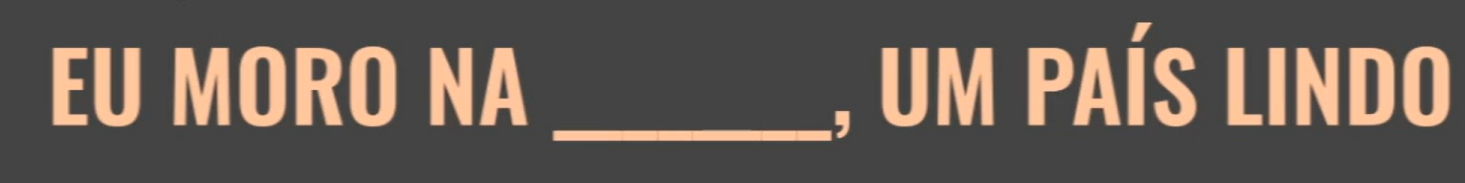

- removendo o que não agrega ao contexto:
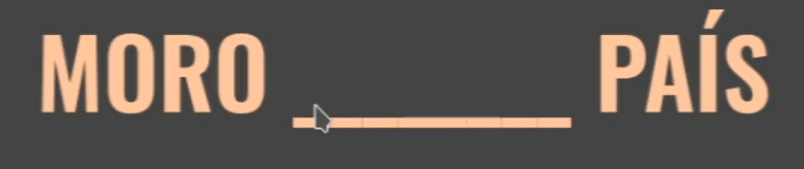

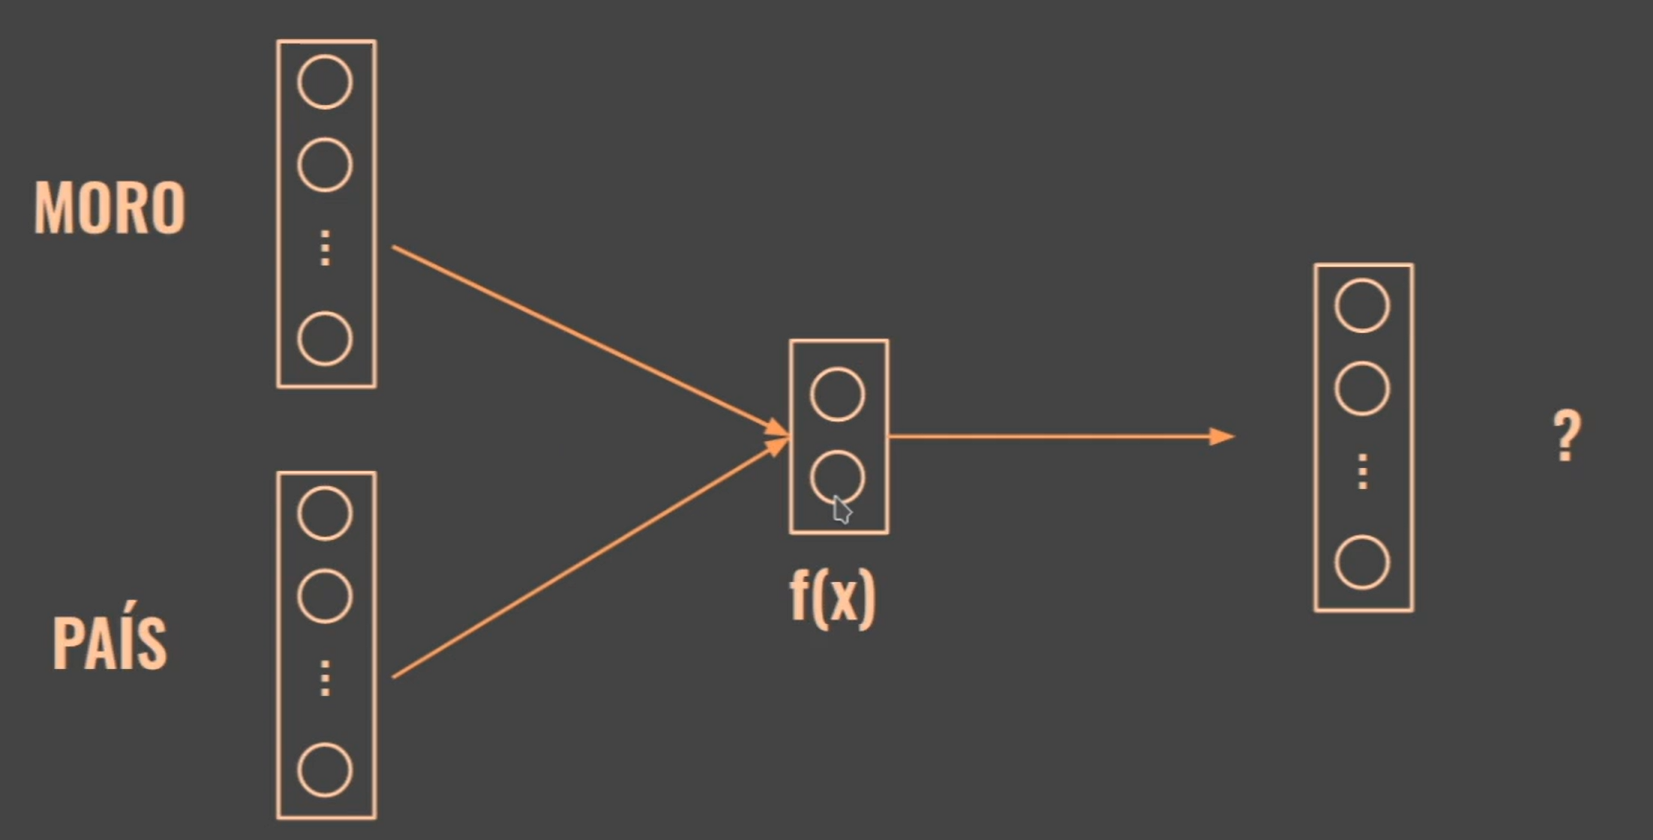

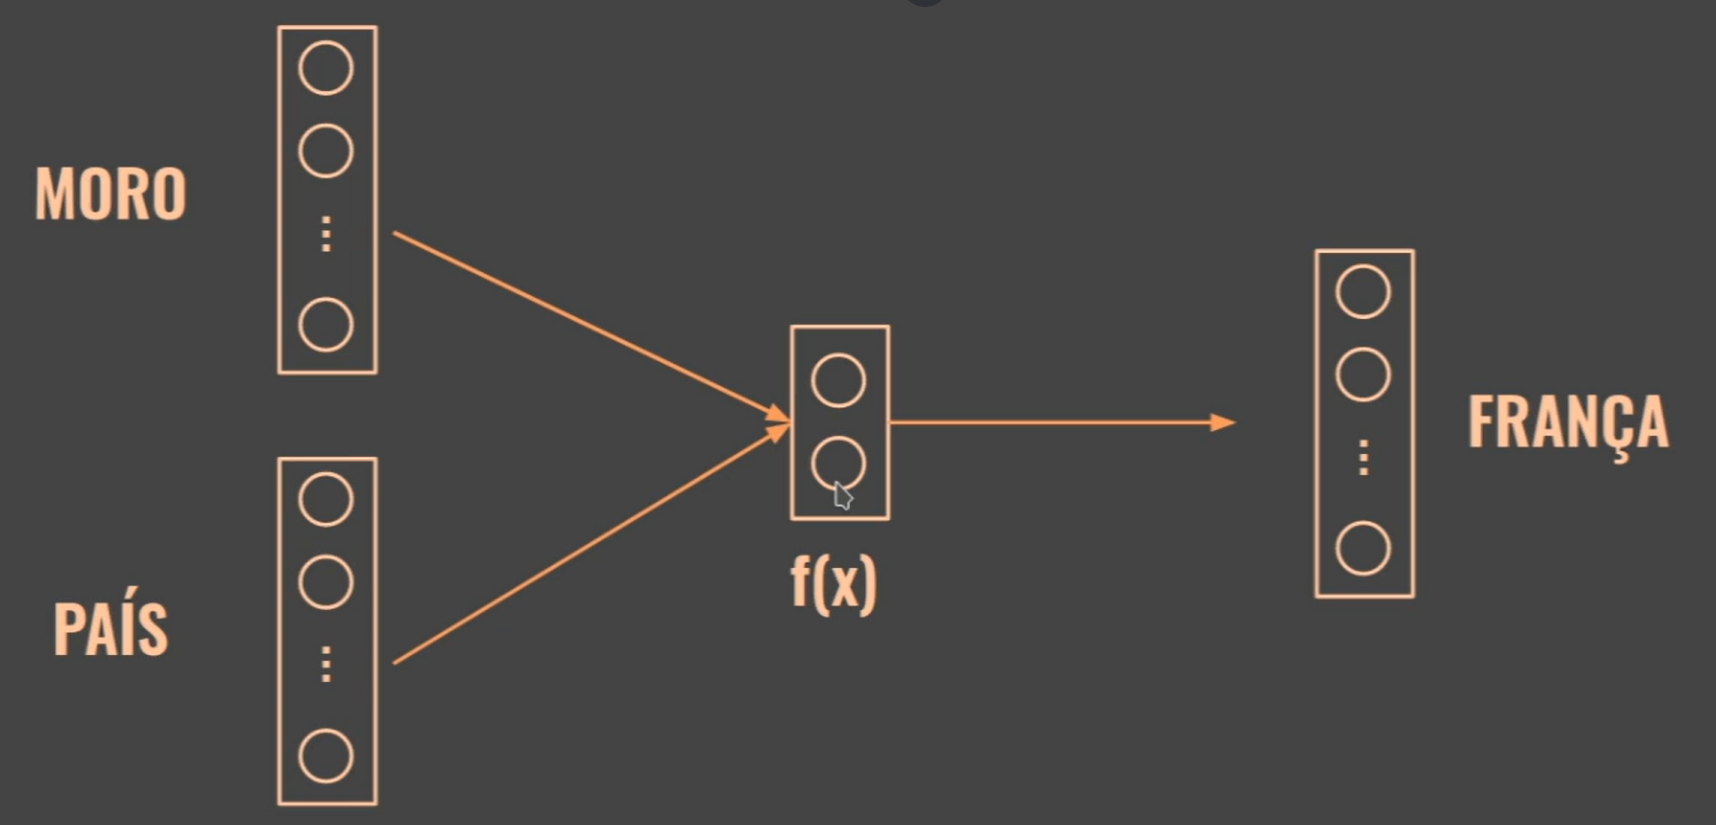

#### Skip-gram
- O modelo Skip-gram faz o oposto do CBOW. Ele tenta prever as palavras que estão no contexto a partir de uma única palavra central. Usando a mesma frase, "o gato preto subiu na árvore", se a palavra central for "preto", o Skip-gram tentaria prever "gato" e "subiu" como palavras de contexto.

- Vantagens:
  - Melhor com dados pequenos: O Skip-gram é mais eficaz em conjuntos de dados menores.

  - Lida melhor com palavras raras: Por ter um foco na palavra central, ele é mais capaz de capturar e fornecer vetores de alta qualidade para palavras raras que não aparecem com tanta frequência no corpus.

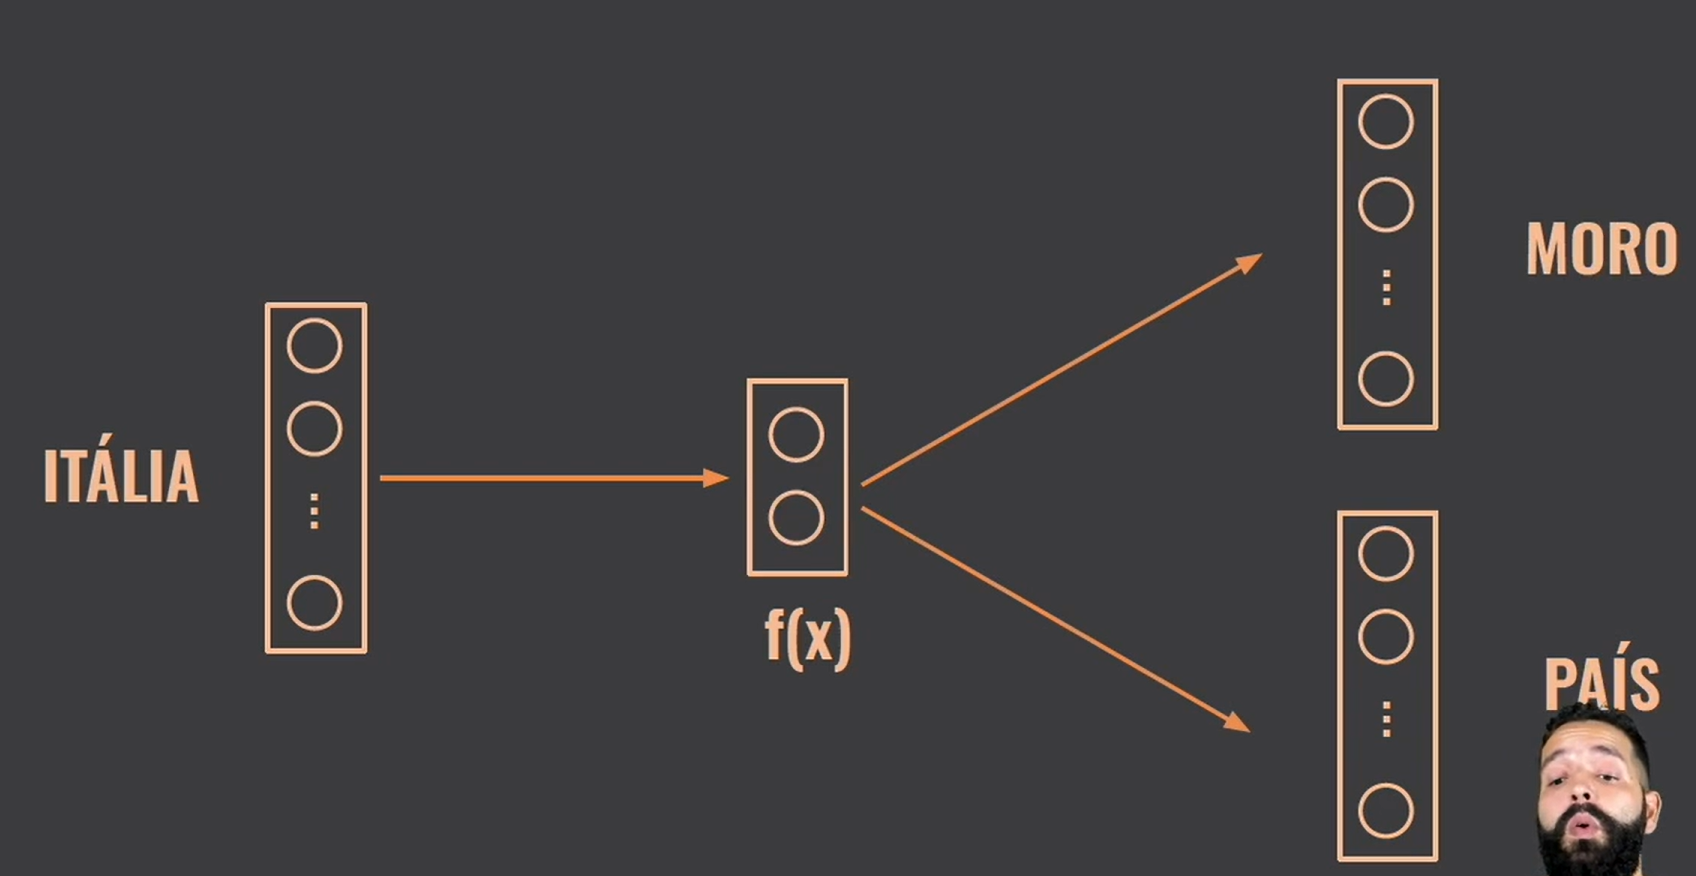

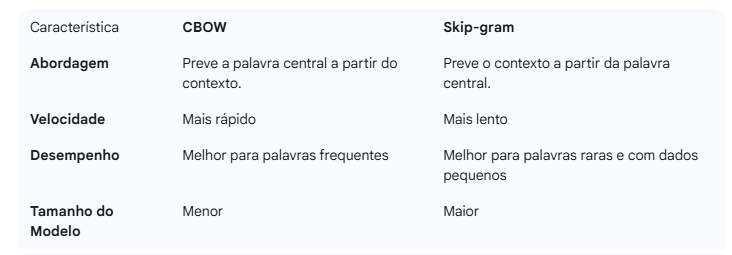

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

MessageError: Error: credential propagation was unsuccessful

**One-Hot Encoding cria representações binárias e independentes para cada palavra, enquanto o Word2vec gera vetores densos que capturam o contexto e a similaridade semântica entre as palavras.**

## Codando

In [2]:
from time import time
import pandas as pd
import spacy
import numpy as np
import pandas as pd

In [3]:
dados_treino = pd.read_csv("/content/drive/My Drive/Word2vec_alura/Word2vec_com_spacy/treino.csv")
dados_treino.sample(5)

title  \
58605  Para sociólogo ecossocialista, somos 'passagei...   
33900  Nicole Kidman diz que indústria do cinema é 'd...   
66747  Crescida na periferia, vereadora novata conqui...   
63607  Auschwitz sintetiza horror do Holocausto em um...   
66165  Osesp abre bem sua temporada com uma percussão...   

                                                    text        date  \
58605  Para o sociólogo Michael Löwy, os socialistas ...  2016-02-04   
33900  A atriz australiana Nicole Kidman defendeu a a...  2015-06-17   
66747  A advogada Janaína Lima, 32, conta que quando ...  2016-09-10   
63607  Às vezes basta uma palavra e tudo está dito. A...  2017-01-27   
66165  Abrir a temporada 2016 da Osesp com a forte e ...  2016-12-03   

        category subcategory  \
58605  ilustrada         NaN   
33900  ilustrada         NaN   
66747  cotidiano         NaN   
63607      mundo         NaN   
66165  ilustrada         NaN   

                                                    link  
58605  http://www1.folha.uol.com.br/ilustrada/2016/04...  
33900  http://www1.folha.uol.com.br/ilustrada/2015/06...  
66747  http://www1.folha.uol.com.br/cotidiano/2016/10...  
63607  http://www1.folha.uol.com.br/mundo/2017/01/185...  
66165  http://www1.folha.uol.com.br/ilustrada/2016/03...

In [4]:
#Rodar apenas uma vez para baixar os dados em portugues e restart session
!python -m spacy download pt_core_news_sm # para baixar os dados em portugues da biblioteca spacy (pt_core_news_sm)

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.0/13.0 MB 78.7 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('pt_core_news_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [5]:
# importando o modelo de linguagem em pt: pt_core_news_sm
nlp = spacy.load("pt_core_news_sm")

In [6]:
nlp

In [7]:
# ao gerar o doc através da instanciação do objeto nlp, a biblioteca faz diversos processamentos nos dados de entrada, como:
# tokenização, parsing, ner entre outros.

texto = "Rio de Janeiro é uma cidade maravilhosa com PIB de R$ 1000 Bilhões de reais"
doc = nlp(texto) # During processing, spaCy first tokenizes the text, i.e. segments it into words, punctuation and so on.

In [8]:
doc

Rio de Janeiro é uma cidade maravilhosa com PIB de R$ 1000 Bilhões de reais

In [9]:
type(doc)

spacy.tokens.doc.Doc

In [10]:
type(doc[2]) # apesar de aparentemente ser o mesmo texto, ele é um objeto do tipo Token da biblioteca Spacy, onde ele devolve (entre outras coisas) o texto tokenizado

spacy.tokens.token.Token

In [11]:
for token in doc:
    print(token.text, token.lemma_, token.pos_, token.tag_, token.dep_,
            token.shape_, token.is_alpha, token.is_stop) # token.is_stop indica se é stopwords

Rio Rio PROPN PROPN nsubj Xxx True False
de de ADP ADP case xx True True
Janeiro Janeiro PROPN PROPN nmod Xxxxx True False
é ser AUX AUX cop x True True
uma um DET DET det xxx True True
cidade cidade NOUN NOUN ROOT xxxx True False
maravilhosa maravilhoso ADJ ADJ amod xxxx True False
com com ADP ADP case xxx True True
PIB PIB PROPN PROPN nmod XXX True False
de de ADP ADP case xx True True
R$ R$ SYM SYM nmod X$ False False
1000 1000 NUM NUM nummod dddd False False
Bilhões Bilhão NUM NUM flat Xxxxx True False
de de ADP ADP case xx True True
reais real NOUN NOUN nmod xxxx True False


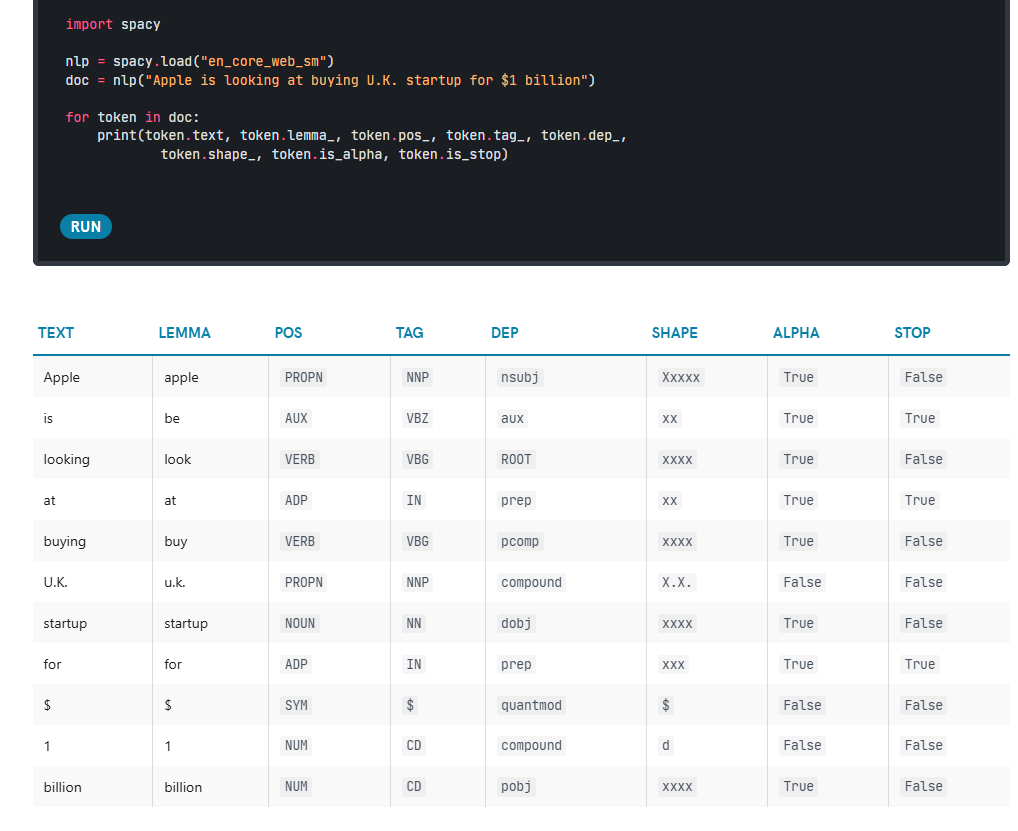

In [12]:
# Entidades nomeadas
for ent in doc.ents:
    print(ent.text, ent.start_char, ent.end_char, ent.label_)

Rio de Janeiro 0 14 LOC
R$ 1000 Bilhões de reais 51 75 MISC


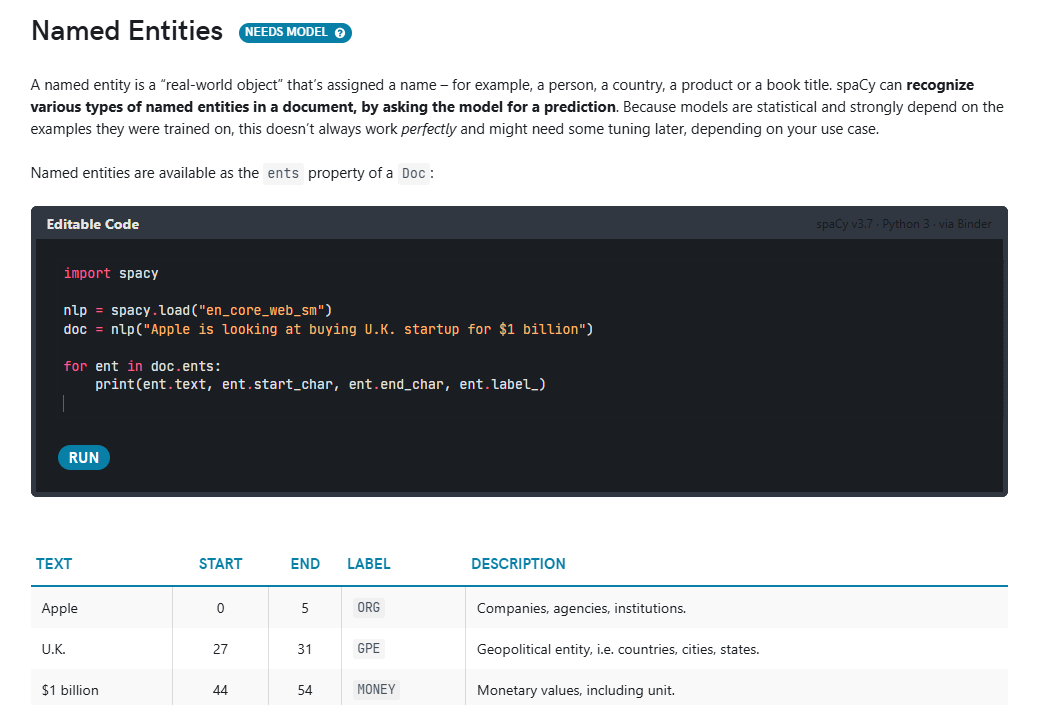

In [13]:
# deixando o título em minusculo
textos_para_tratamento = (titulos.lower() for titulos in dados_treino["title"])

In [14]:
# função que retira do título stopwords (is_stop), números, pois não agregam no significado/semântica
def trata_textos(doc):
    tokens_validos = []
    for token in doc:
        e_valido = not token.is_stop and token.is_alpha # caracter alfabético
        if e_valido:
            tokens_validos.append(token.text)

    if len(tokens_validos) > 2: # maior que dois para eliminar títulos muito curtos que não teriam muito a agregar
        return  " ".join(tokens_validos)

In [15]:
texto = "Rio de Janeiro 1231231 ***** @#$ é uma cidade maravilhosa!"
doc = nlp(texto)
trata_textos(doc)

'Rio Janeiro cidade maravilhosa'

In [16]:
texto = "Rio de Janeiro cidade"
doc = nlp(texto)
trata_textos(doc)

'Rio Janeiro cidade'

In [17]:
# não tem retorno pois entra na regra de menor que 2 palavras definida em trata_textos()
texto = "Rio de Janeiro"
doc = nlp(texto)
trata_textos(doc)

In [18]:
# Faz efetivamente a passagem dos títulos para minusculo e para cada título executa a função trata_textos()

t0 = time() # para verificar quanto tempo o processamento irá demorar
textos_tratados = [trata_textos(doc) for doc in nlp.pipe(textos_para_tratamento,
                                                        batch_size = 1000,
                                                        n_process = -1)] # com -1 utiliza todos os núcleos disponíveis do processador

tf = time() - t0 # para verificar quanto tempo o processamento irá demorar

print(tf/60) # para verificar quanto tempo o processamento irá demorar em minutos

5.282873634497324


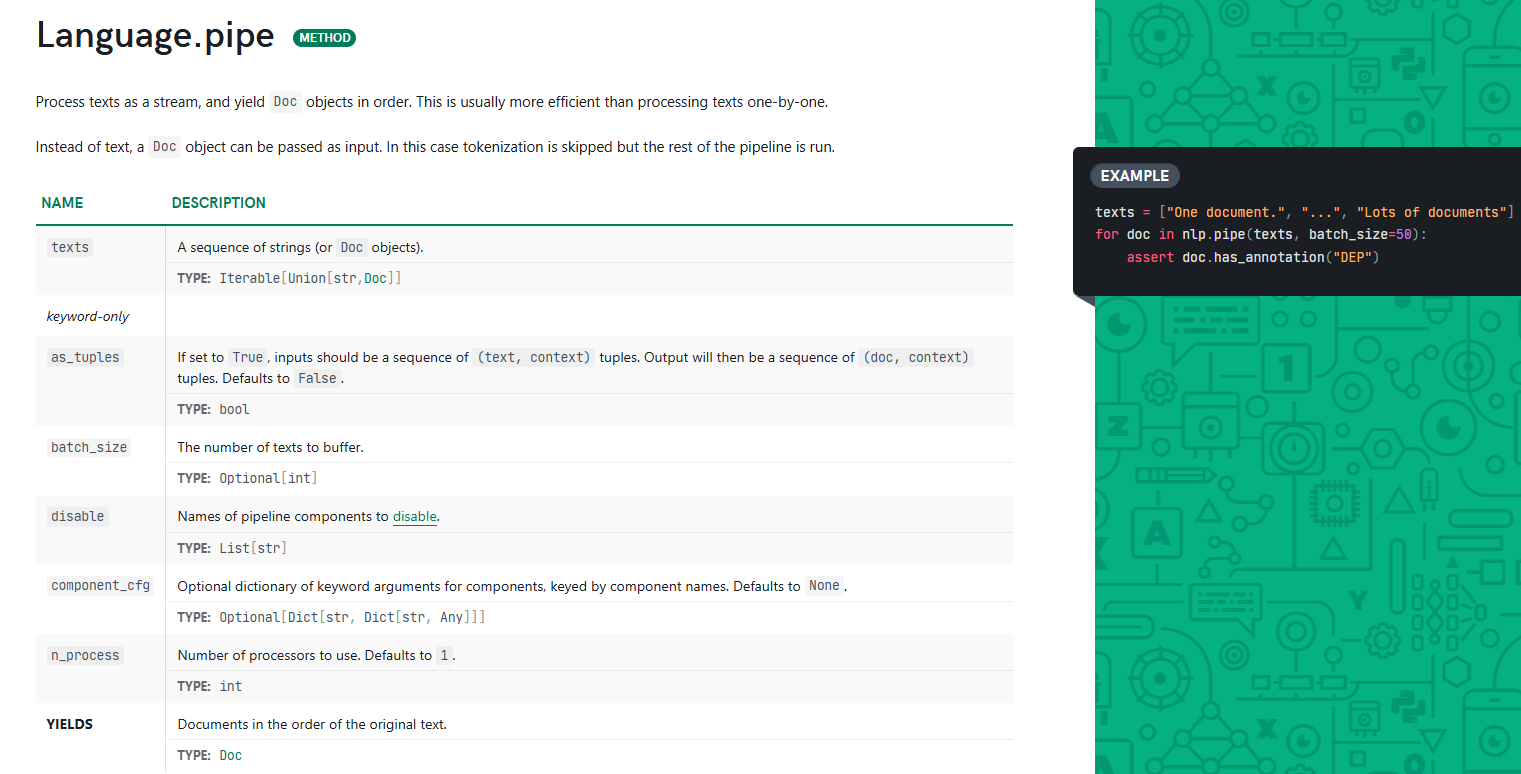

In [19]:
# adicionando os textos tratados em um DataFrame

titulos_tratados = pd.DataFrame({"titulo": textos_tratados})
titulos_tratados.head()

titulo
0  polêmica marine le pen abomina negacionistas h...
1  macron le pen turno frança revés siglas tradic...
2  apesar larga vitória legislativas macron terá ...
3  governo antecipa balanço alckmin anuncia queda...
4       queda maio atividade econômica sobe junho bc

### Iniciando o treinamento do modelo Word2Vec

In [1]:
!pip install gensim

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 4.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.6/60.6 kB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.7/26.7 MB 69.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 92.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.6/38.6 MB 17.8 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
  Attempting uninstall: scipy
    Found existing installation: scipy 1.16.1
    Uninstalling scipy-1.16.1:
      Successfully uninstalled scipy-1.16.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
opencv-python 4.12.0.88 requires numpy<2.3.0,>=2; python_version >= "3.9", but you have numpy 1.26.4 which is incompatible.
openc

##### Treinamento do modelo CBOW

In [20]:
from gensim.models import Word2Vec
from gensim.models import KeyedVectors
import logging

logging.basicConfig(format="%(asctime)s : - %(message)s", level = logging.INFO) # para ver as mensagens de log do modelo

w2v_modelo_cbow = Word2Vec(sg = 0, # determina qual técnica será usada, sg = skipgram | sg=0 --> CBOW | sg=1 --> SKIPGRAM
                      window = 2, # define quantas palavras será considerada antes e depois, ou seja, o contexto
                      vector_size = 300, # tamanho do vetor
                      min_count = 5, # ignora todas as palavras com frequência menor que o indicado, ou seja, se a palavra aparecer menos que 5 vezes, será descartada
                      alpha = 0.03, # learning rate inicial
                      min_alpha = 0.007) # valor que a taxa de aprendizada irá decaindo linearmente conforme o treinamento avança. O valor de alpha decai até chagar no valor do min_alpha

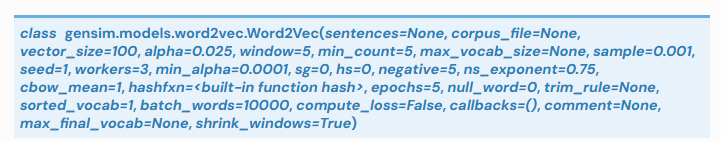

- referência do modelo [word2vec](https://radimrehurek.com/gensim/models/word2vec.html) no gensim

In [21]:
w2v_modelo_cbow

In [22]:
# retirando os titulos tokenizados duplicados e vazios, já que na função trata_textos() pode vir listas vazias quando os titulos tiver 2 palavras ou menos
print(len(titulos_tratados))
titulos_tratados = titulos_tratados.dropna().drop_duplicates()
print(len(titulos_tratados))

90000
84466


In [23]:
titulos_tratados[0:5]

titulo
0  polêmica marine le pen abomina negacionistas h...
1  macron le pen turno frança revés siglas tradic...
2  apesar larga vitória legislativas macron terá ...
3  governo antecipa balanço alckmin anuncia queda...
4       queda maio atividade econômica sobe junho bc

In [24]:
lista_lista_tokens = [titulo.split(" ") for titulo in titulos_tratados.titulo] # para cada titulo, separa as palavras com um espaço em branco

In [25]:
lista_lista_tokens[0:5]

[['polêmica', 'marine', 'le', 'pen', 'abomina', 'negacionistas', 'holocausto'],
 ['macron', 'le', 'pen', 'turno', 'frança', 'revés', 'siglas', 'tradicionais'],
 ['apesar',
  'larga',
  'vitória',
  'legislativas',
  'macron',
  'terá',
  'desafios',
  'frente'],
 ['governo',
  'antecipa',
  'balanço',
  'alckmin',
  'anuncia',
  'queda',
  'homicídios',
  'sp'],
 ['queda', 'maio', 'atividade', 'econômica', 'sobe', 'junho', 'bc']]

- O método build_vocab da biblioteca Gensim constrói o vocabulário do modelo Word2vec, lendo e processando um corpus de texto para identificar todas as palavras únicas e prepará-las para o treinamento.

In [26]:
w2v_modelo_cbow.build_vocab(lista_lista_tokens, progress_per=5000) # para isso já utiliza a lista com as listas dos titulos tratados

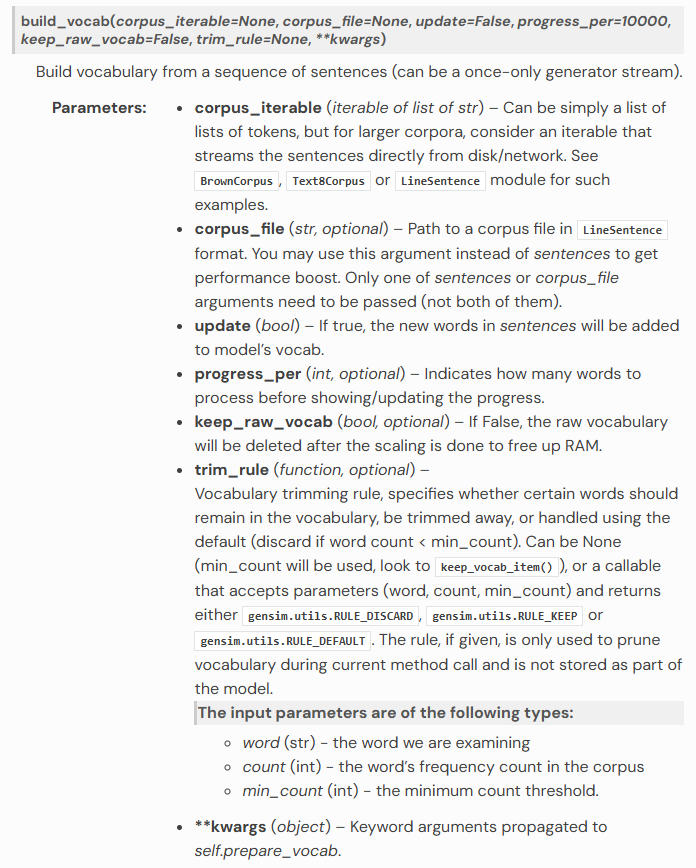

In [27]:
dir(w2v_modelo_cbow) # lista com todos os atributos e metodos do objeto do modelo

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_adapt_by_suffix',
 '_check_corpus_sanity',
 '_check_training_sanity',
 '_clear_post_train',
 '_do_train_epoch',
 '_do_train_job',
 '_get_next_alpha',
 '_get_thread_working_mem',
 '_job_producer',
 '_load_specials',
 '_log_epoch_end',
 '_log_epoch_progress',
 '_log_progress',
 '_log_train_end',
 '_raw_word_count',
 '_save_specials',
 '_scan_vocab',
 '_smart_save',
 '_train_epoch',
 '_train_epoch_corpusfile',
 '_worker_loop',
 '_worker_loop_corpusfile',
 'add_lifecycle_event',
 'add_null_word',
 'alpha',
 'batch_words',
 'build_vocab',
 'build_vocab_from_freq',
 'cbow_mean',
 'comment',
 'compute_loss',
 

In [30]:
from gensim.models.callbacks import CallbackAny2Vec
from gensim.models import Word2Vec

# iniciando a chamada callback
class callback(CallbackAny2Vec):
  def __init__(self):
    self.epoch = 0

  def on_epoch_end(self, model):
    loss = model.get_latest_training_loss()
    if self.epoch == 0:
        print('Loss após a época {}: {}'.format(self.epoch, loss))
    else:
        print('Loss após a época {}: {}'.format(self.epoch, loss- self.loss_previous_step))
    self.epoch += 1
    self.loss_previous_step = loss

In [31]:
w2v_modelo_cbow.corpus_count # armazena a quantidade de amostras que foram utilizadas para construir o vocabulario do modelo.

84466

In [32]:
# treinamento do modelo word2vec usando a técnica cbow
w2v_modelo_cbow.train(lista_lista_tokens,
                 total_examples=w2v_modelo_cbow.corpus_count,
                 epochs = 30,
                 compute_loss = True,
                 callbacks=[callback()])

Loss após a época 0: 599750.4375
Loss após a época 1: 462881.3125
Loss após a época 2: 409383.25
Loss após a época 3: 330209.25
Loss após a época 4: 326097.5
Loss após a época 5: 312925.25
Loss após a época 6: 277009.0
Loss após a época 7: 306081.75
Loss após a época 8: 245029.5
Loss após a época 9: 259396.0
Loss após a época 10: 231491.25
Loss após a época 11: 219971.75
Loss após a época 12: 219831.25
Loss após a época 13: 179304.5
Loss após a época 14: 180642.0
Loss após a época 15: 180999.5
Loss após a época 16: 148713.0
Loss após a época 17: 142834.5
Loss após a época 18: 161755.5
Loss após a época 19: 147156.5
Loss após a época 20: 142203.5
Loss após a época 21: 138052.0
Loss após a época 22: 139574.5
Loss após a época 23: 135910.5
Loss após a época 24: 118418.0
Loss após a época 25: 102912.0
Loss após a época 26: 100261.5
Loss após a época 27: 110842.5
Loss após a época 28: 102197.0
Loss após a época 29: 105460.0


(14584409, 16207260)

In [33]:
w2v_modelo_cbow.wv.most_similar("google")

[('apple', 0.5882166624069214),
 ('facebook', 0.5108609199523926),
 ('uber', 0.48334023356437683),
 ('amazon', 0.4814577102661133),
 ('yahoo', 0.47656354308128357),
 ('software', 0.46726492047309875),
 ('airbnb', 0.4608832895755768),
 ('tesla', 0.443783164024353),
 ('fbi', 0.4345496892929077),
 ('promotora', 0.4307112395763397)]

In [34]:
w2v_modelo_cbow.wv.most_similar("microsoft")

[('unilever', 0.5942984819412231),
 ('tesla', 0.5458694696426392),
 ('braskem', 0.5132978558540344),
 ('amazon', 0.5058190226554871),
 ('sky', 0.49167805910110474),
 ('linkedin', 0.4838748872280121),
 ('walmart', 0.4809846878051758),
 ('renault', 0.46796223521232605),
 ('ikea', 0.4677770137786865),
 ('editora', 0.4627634882926941)]

In [35]:
w2v_modelo_cbow.wv.most_similar("barcelona")

[('bayern', 0.5616554021835327),
 ('madrid', 0.5499579310417175),
 ('psg', 0.5487631559371948),
 ('munique', 0.5477320551872253),
 ('barça', 0.5426633954048157),
 ('chelsea', 0.5328360795974731),
 ('united', 0.5217196345329285),
 ('betis', 0.5184699296951294),
 ('liverpool', 0.5131018161773682),
 ('islândia', 0.5124553442001343)]

In [36]:
w2v_modelo_cbow.wv.most_similar("messi")

[('suárez', 0.591912567615509),
 ('cavani', 0.5452278256416321),
 ('cristiano', 0.5330935120582581),
 ('tevez', 0.5219001173973083),
 ('neymar', 0.5198928117752075),
 ('barça', 0.5090177059173584),
 ('ronaldo', 0.5075079202651978),
 ('chuteiras', 0.5008516311645508),
 ('psg', 0.4840488135814667),
 ('enrique', 0.47363197803497314)]

In [37]:
w2v_modelo_cbow.wv.most_similar("gm")

[('chrysler', 0.6679566502571106),
 ('embraer', 0.6499613523483276),
 ('volks', 0.6296066045761108),
 ('braskem', 0.602952241897583),
 ('fiat', 0.6003838777542114),
 ('csn', 0.595162034034729),
 ('honda', 0.5783355832099915),
 ('sabmiller', 0.571872353553772),
 ('usiminas', 0.571022093296051),
 ('metalúrgicos', 0.5670325756072998)]

In [38]:
# metodo para salvar o modelo no formato correto
w2v_modelo_cbow.wv.save_word2vec_format("/content/drive/My Drive/Word2vec_alura/modelo_cbow.txt", binary=False)

In [39]:
# carregando o modelo e os dados de treino e teste
w2v_modelo_cbow = KeyedVectors.load_word2vec_format("/content/drive/My Drive/Word2vec_alura/modelo_cbow.txt")
artigo_treino = pd.read_csv("/content/drive/My Drive/Word2vec_alura/Word2vec_com_spacy/treino.csv")
artigo_teste = pd.read_csv("/content/drive/My Drive/Word2vec_alura/Word2vec_com_spacy/teste.csv")

In [41]:
nlp = spacy.load("pt_core_news_sm", disable=["paser", "ner", "tagger", "textcat"]) # desabilita alguns itens do objeto nlp, pois já tem as funções abaixo

def tokenizador(texto):

    doc = nlp(texto)
    tokens_validos = []
    for token in doc:
        e_valido = not token.is_stop and token.is_alpha
        if e_valido:
            tokens_validos.append(token.text.lower())


    return  tokens_validos

In [42]:
texto = "Rio de Janeiro 1231231 ***** @#$ é uma cidade maravilhosa!"
tokens = tokenizador(texto)
print(tokens)

['rio', 'janeiro', 'cidade', 'maravilhosa']


In [43]:
def combinacao_de_vetores_por_soma(palavras, modelo):

    vetor_resultante = np.zeros((1,300))

    for pn in palavras:
        try:
            vetor_resultante += modelo.get_vector(pn)

        except KeyError:
            pass


    return vetor_resultante

In [44]:
vetor_texto = combinacao_de_vetores_por_soma(tokens, w2v_modelo_cbow)
print(vetor_texto.shape)
print(vetor_texto)

(1, 300)
[[ 0.40029823 -0.11580348  1.24086162 -1.54737261  0.56034918  1.9150323
  -1.69996265 -0.44313386 -0.14006707 -1.20040597  0.13502976  0.78340413
  -0.36744494  0.74093872  0.03266558 -2.23311981  0.2790002  -1.42940985
   0.48837985  0.9009226  -0.52396834 -1.33671045 -0.84028319  0.04977099
   0.13576696 -1.32357241  1.2273818   0.69150731  0.09369637  0.52378754
  -1.06219326 -1.81163506  0.68215807  2.37062119  1.11534825  1.47754243
  -2.55289251 -0.92901357  0.99097174 -0.98270145 -0.45048695  0.18090241
   1.30692726 -0.34846789 -2.85037783 -0.99386722  3.63569868 -0.97595996
   1.08664057  1.05064166 -1.96556431 -1.32691701  1.15779188 -1.16107197
  -0.12021929  1.53680833 -0.06725335 -0.07246574  1.29152638  0.18507526
  -1.52202401 -1.57780943  0.8978581  -1.69578028  1.94434562 -0.1459226
   1.62353733  0.85179305 -0.09467322 -1.32729707  1.70355979  1.93317808
   0.20752223 -0.037497    1.38793868  0.80248128  0.5042311  -0.68883476
  -1.74275503  0.83035271 -1.16

In [45]:
def matriz_vetores(textos, modelo):
    x = len(textos)
    y = 300
    matriz = np.zeros((x,y))

    for i in range(x):
        palavras = tokenizador(textos.iloc[i])
        matriz[i] = combinacao_de_vetores_por_soma(palavras, modelo)

    return matriz

In [46]:
matriz_vetores_treino_cbow = matriz_vetores(artigo_treino.title, w2v_modelo_cbow)
matriz_vetores_teste_cbow = matriz_vetores(artigo_teste.title, w2v_modelo_cbow)
print(matriz_vetores_treino_cbow.shape)
print(matriz_vetores_teste_cbow.shape)

(90000, 300)
(20513, 300)


In [47]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

def classificador(modelo, x_treino, y_treino, x_teste, y_teste):

    RL = LogisticRegression(max_iter = 800)
    RL.fit(x_treino, y_treino)
    categorias = RL.predict(x_teste)
    resultados = classification_report(y_teste, categorias)
    print(resultados)

    return RL

In [48]:
RL_cbow = classificador(w2v_modelo_cbow,
                        matriz_vetores_treino_cbow,
                        artigo_treino.category,
                        matriz_vetores_teste_cbow,
                        artigo_teste.category)

              precision    recall  f1-score   support

     colunas       0.80      0.71      0.75      6103
   cotidiano       0.64      0.81      0.71      1698
     esporte       0.92      0.86      0.89      4663
   ilustrada       0.13      0.84      0.23       131
     mercado       0.84      0.78      0.81      5867
       mundo       0.74      0.83      0.79      2051

    accuracy                           0.79     20513
   macro avg       0.68      0.81      0.70     20513
weighted avg       0.82      0.79      0.80     20513



In [49]:
import pickle

with open("/content/drive/My Drive/Word2vec_alura/Word2vec_com_spacy/rl_cbow.pkl", "wb") as f:
    pickle.dump(RL_cbow, f)

##### Treinamento do modelo Skip-Gram

In [52]:
# Treinamento do modelo Skip-Gram
from gensim.models import Word2Vec
import logging
from gensim.models.callbacks import CallbackAny2Vec
from gensim.models import Word2Vec

logging.basicConfig(format="%(asctime)s : - %(message)s", level = logging.INFO) # para ver as mensagens de log do modelo

# iniciando a chamada callback
class callback(CallbackAny2Vec):
  def __init__(self):
    self.epoch = 0

  def on_epoch_end(self, model):
    loss = model.get_latest_training_loss()
    if self.epoch == 0:
        print('Loss após a época {}: {}'.format(self.epoch, loss))
    else:
        print('Loss após a época {}: {}'.format(self.epoch, loss- self.loss_previous_step))
    self.epoch += 1
    self.loss_previous_step = loss

w2v_modelo_sg = Word2Vec(sg = 1,
                      window = 5, #no artigo indica que o skip gram performa maior com window maior
                      vector_size = 300,
                      min_count = 5,
                      alpha = 0.03,
                      min_alpha = 0.007)

w2v_modelo_sg.build_vocab(lista_lista_tokens, progress_per=5000)

w2v_modelo_sg.train(lista_lista_tokens,
                 total_examples=w2v_modelo_sg.corpus_count,
                 epochs = 30,
                 compute_loss = True,
                 callbacks=[callback()])

Loss após a época 0: 1750370.0
Loss após a época 1: 1434010.75
Loss após a época 2: 1326808.75
Loss após a época 3: 1082001.0
Loss após a época 4: 1103056.0
Loss após a época 5: 1006470.0
Loss após a época 6: 989459.5
Loss após a época 7: 880277.0
Loss após a época 8: 807943.0
Loss após a época 9: 830808.0
Loss após a época 10: 764452.0
Loss após a época 11: 823883.0
Loss após a época 12: 802894.0
Loss após a época 13: 744708.0
Loss após a época 14: 724187.0
Loss após a época 15: 709884.0
Loss após a época 16: 658323.0
Loss após a época 17: 597575.0
Loss após a época 18: 477214.0
Loss após a época 19: 466138.0
Loss após a época 20: 507250.0
Loss após a época 21: 449130.0
Loss após a época 22: 440724.0
Loss após a época 23: 454968.0
Loss após a época 24: 425592.0
Loss após a época 25: 393964.0
Loss após a época 26: 434252.0
Loss após a época 27: 426032.0
Loss após a época 28: 417584.0
Loss após a época 29: 411110.0


(14584206, 16207260)

In [53]:
w2v_modelo_sg.wv.most_similar("google")

[('reguladores', 0.42278340458869934),
 ('android', 0.3923843502998352),
 ('apple', 0.391750693321228),
 ('facebook', 0.38581356406211853),
 ('toshiba', 0.37825703620910645),
 ('yahoo', 0.3656909465789795),
 ('buffett', 0.3598223030567169),
 ('concorda', 0.3578764796257019),
 ('waze', 0.35681089758872986),
 ('app', 0.35594987869262695)]

In [57]:
w2v_modelo_sg.wv.most_similar("gm")

[('metalúrgicos', 0.5698827505111694),
 ('motors', 0.5096189379692078),
 ('audi', 0.498055636882782),
 ('honda', 0.4865078926086426),
 ('airbag', 0.4751647114753723),
 ('montadora', 0.46628859639167786),
 ('mitsubishi', 0.4650304317474365),
 ('bmw', 0.46374770998954773),
 ('autoguiados', 0.4550294280052185),
 ('airbags', 0.45470234751701355)]

In [58]:
# metodo para salvar o modelo no formato correto
#w2v_modelo.wv.save_word2vec_format("/content/drive/My Drive/Word2vec_alura/modelo_cbow.txt", binary=False)
w2v_modelo_sg.wv.save_word2vec_format("/content/drive/My Drive/Word2vec_alura/modelo_skipgram.txt", binary=False)

In [59]:
import spacy
import numpy as np
import pandas as pd
from gensim.models import KeyedVectors

#
#w2v_modelo_cbow = KeyedVectors.load_word2vec_format("/content/drive/My Drive/Word2vec_alura/modelo_cbow.txt")
w2v_modelo_sg = KeyedVectors.load_word2vec_format("/content/drive/My Drive/Word2vec_alura/modelo_skipgram.txt")
artigo_treino = pd.read_csv("/content/drive/My Drive/Word2vec_alura/Word2vec_com_spacy/treino.csv")
artigo_teste = pd.read_csv("/content/drive/My Drive/Word2vec_alura/Word2vec_com_spacy/teste.csv")

In [60]:
# instanciando o nlp: carrega os dados de pt_core_news_sm e em disable, desabilita os passos que não serão utilizados, como paser, ner etc
nlp = spacy.load("pt_core_news_sm", disable=["paser", "ner", "tagger", "textcat"])

def tokenizador(texto):

    doc = nlp(texto)
    tokens_validos = []
    for token in doc:
        e_valido = not token.is_stop and token.is_alpha
        if e_valido:
            tokens_validos.append(token.text.lower())


    return  tokens_validos

In [61]:
texto = "Rio de Janeiro 1231231 ***** @#$ é uma cidade maravilhosa!"
tokens = tokenizador(texto)
print(tokens)

['rio', 'janeiro', 'cidade', 'maravilhosa']


In [62]:
def combinacao_de_vetores_por_soma(palavras, modelo):

    vetor_resultante = np.zeros((1,300))

    for pn in palavras:
        try:
            vetor_resultante += modelo.get_vector(pn)

        except KeyError:
            pass


    return vetor_resultante

In [63]:
vetor_texto = combinacao_de_vetores_por_soma(tokens, w2v_modelo_cbow)
print(vetor_texto.shape)
print(vetor_texto)

(1, 300)
[[ 0.40029823 -0.11580348  1.24086162 -1.54737261  0.56034918  1.9150323
  -1.69996265 -0.44313386 -0.14006707 -1.20040597  0.13502976  0.78340413
  -0.36744494  0.74093872  0.03266558 -2.23311981  0.2790002  -1.42940985
   0.48837985  0.9009226  -0.52396834 -1.33671045 -0.84028319  0.04977099
   0.13576696 -1.32357241  1.2273818   0.69150731  0.09369637  0.52378754
  -1.06219326 -1.81163506  0.68215807  2.37062119  1.11534825  1.47754243
  -2.55289251 -0.92901357  0.99097174 -0.98270145 -0.45048695  0.18090241
   1.30692726 -0.34846789 -2.85037783 -0.99386722  3.63569868 -0.97595996
   1.08664057  1.05064166 -1.96556431 -1.32691701  1.15779188 -1.16107197
  -0.12021929  1.53680833 -0.06725335 -0.07246574  1.29152638  0.18507526
  -1.52202401 -1.57780943  0.8978581  -1.69578028  1.94434562 -0.1459226
   1.62353733  0.85179305 -0.09467322 -1.32729707  1.70355979  1.93317808
   0.20752223 -0.037497    1.38793868  0.80248128  0.5042311  -0.68883476
  -1.74275503  0.83035271 -1.16

In [64]:
def matriz_vetores(textos, modelo):
    x = len(textos)
    y = 300
    matriz = np.zeros((x,y))

    for i in range(x):
        palavras = tokenizador(textos.iloc[i])
        matriz[i] = combinacao_de_vetores_por_soma(palavras, modelo)

    return matriz

In [ ]:
# matriz_vetores_treino_cbow = matriz_vetores(artigo_treino.title, w2v_modelo_cbow)
# matriz_vetores_teste_cbow = matriz_vetores(artigo_teste.title, w2v_modelo_cbow)
# print(matriz_vetores_treino_cbow.shape)
# print(matriz_vetores_teste_cbow.shape)

(90000, 300)
(20513, 300)


In [65]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

def classificador(modelo, x_treino, y_treino, x_teste, y_teste):

    RL = LogisticRegression(max_iter = 800)
    RL.fit(x_treino, y_treino)
    categorias = RL.predict(x_teste)
    resultados = classification_report(y_teste, categorias)
    print(resultados)

    return RL

In [ ]:
# RL_cbow = classificador(w2v_modelo_cbow,
#                         matriz_vetores_treino_cbow,
#                         artigo_treino.category,
#                         matriz_vetores_teste_cbow,
#                         artigo_teste.category)

              precision    recall  f1-score   support

     colunas       0.80      0.71      0.75      6103
   cotidiano       0.64      0.80      0.71      1698
     esporte       0.93      0.87      0.90      4663
   ilustrada       0.13      0.84      0.22       131
     mercado       0.84      0.78      0.81      5867
       mundo       0.74      0.83      0.78      2051

    accuracy                           0.79     20513
   macro avg       0.68      0.81      0.70     20513
weighted avg       0.82      0.79      0.80     20513



In [66]:
matriz_vetores_treino_sg = matriz_vetores(artigo_treino.title, w2v_modelo_sg)
matriz_vetores_teste_sg = matriz_vetores(artigo_teste.title, w2v_modelo_sg)

RL_sg = classificador(w2v_modelo_sg,
                        matriz_vetores_treino_sg,
                        artigo_treino.category,
                        matriz_vetores_teste_sg,
                        artigo_teste.category)

              precision    recall  f1-score   support

     colunas       0.81      0.71      0.76      6103
   cotidiano       0.64      0.80      0.71      1698
     esporte       0.93      0.87      0.90      4663
   ilustrada       0.14      0.89      0.25       131
     mercado       0.84      0.79      0.82      5867
       mundo       0.76      0.84      0.80      2051

    accuracy                           0.79     20513
   macro avg       0.69      0.82      0.71     20513
weighted avg       0.82      0.79      0.80     20513



In [ ]:
# import pickle

# with open("/content/drive/My Drive/Word2vec_alura/Word2vec_com_spacy/rl_cbow.pkl", "wb") as f:
#     pickle.dump(RL_cbow, f)

In [67]:
with open("/content/drive/My Drive/Word2vec_alura/Word2vec_com_spacy/rl_sg.pkl", "wb") as f:
    pickle.dump(RL_sg, f)